# Plotting and Visualization using Matplotlib

Python has many add-on libraries for making static or dynamic visualizations.
In this course we will be mainly focused on matplotlib and libraries that build on top of it.

matplotlib is a desktop plotting package designed for creating (mostly twodimensional)
publication-quality plots.

The project was started by John Hunter in
2002 to enable a MATLAB-like plotting interface in Python. The matplotlib and IPython
communities have collaborated to simplify interactive plotting from the IPython
shell (and now, Jupyter notebook). matplotlib supports various GUI backends on all
operating systems and additionally can export visualizations to all of the common
vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.).

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

The simplest way to follow the code examples in the chapter is to use interactive plotting
in the Jupyter notebook. To set this up, execute the following statement in a
Jupyter notebook

In [2]:
%matplotlib inline

## A Brief matplotlib API Primer

With matplotlib, we use the following import convention:

In [3]:
import matplotlib.pyplot as plt

After running ```%matplotlib inline``` in Jupyter,
we can try creating a simple plot. If everything is set up right, a line plot should be creaed:

### Types of inputs to plotting functions
All of plotting functions expect ```np.array``` or ```np.ma.masked_array``` as input. Classes that are 'array-like' such as ```pandas``` data objects and ```np.matrix``` may or may not work as intended. It is best to convert these to ```np.array``` objects prior to plotting.

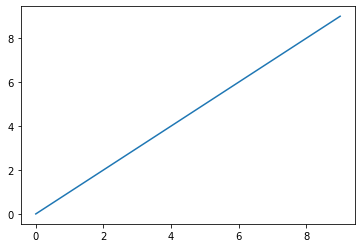

In [4]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

![](anatomy.png)

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with
```plt.figure```:

In [7]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

```plt.figure``` has a number of options; notably,
```figsize``` will guarantee the figure has a certain size and aspect ratio if saved to disk.

You can’t make a plot with a blank figure. You have to create one or more subplots
using ```add_subplot```:

In [8]:
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
selecting the first of four subplots (numbered from 1). If you create the next two subplots

In [9]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

One nuance of using Jupyter notebooks is that plots are reset after
each cell is evaluated, so for more complex plots you must put all of
the plotting commands in a single notebook cell.

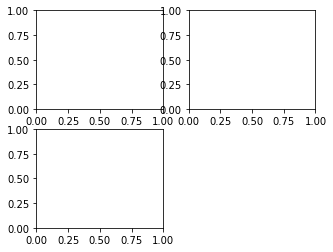

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib
draws on the last figure and subplot used (creating one if necessary), thus hiding
the figure and subplot creation.

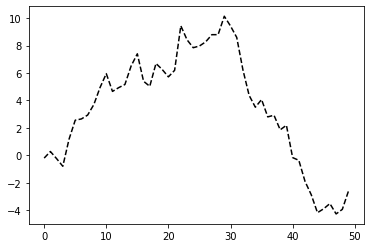

In [5]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The
objects returned by fig.add_subplot here are AxesSubplot objects, on which you
can directly plot on the other empty subplots by calling each one’s instance method.

In [13]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

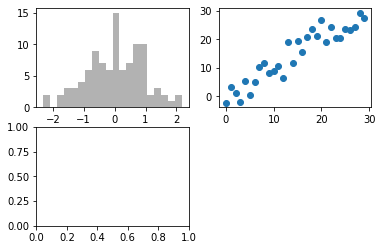

In [14]:
fig

In [15]:
plt.close('all')

Creating a figure with a grid of subplots is a very common task, so matplotlib
includes a convenience method, ```plt.subplots```, that creates a new figure and returns
a NumPy array containing the created subplot objects

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd71382d210>,
      dtype=object)

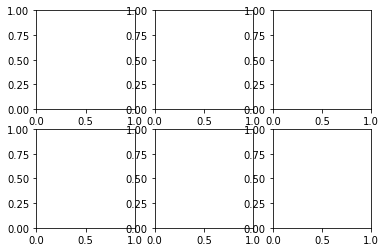

In [33]:
fig, axes = plt.subplots(2, 3)
axes

In Matplotlib, the figure (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class `plt.Axes`)
is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects. The axes array can be easily indexed like a two-dimensional array; for example, ```axes[0, 1]```.

| Argument        | Description | 
| ------------- |:-------------:|
| nrows     | Number of rows of subplots |
| ncols      | Number of columns of subplots     | 
| sharex | All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)      | 
| sharey | All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)      | 
| subplot_kw | Dict of keywords passed to add_subplot call used to create each subplot     | 
| `**fig_kw` | Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))      | 


This is equivalent to 
```python
fig = plt.figure()
ax = plt.axes()
```

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the
subplots and spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself. You can
change the spacing using the subplots_adjust method on Figure objects, also available
as a top-level function:

```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

`wspace` and `hspace` controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots. Here is a small example where I shrink the
spacing all the way to zero

```python
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)
```

```
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.2   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis heigh
```

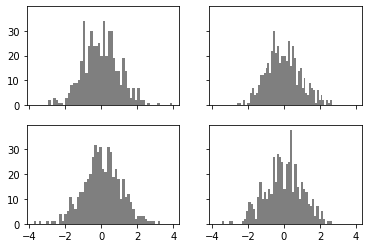

In [34]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

### Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a
string abbreviation indicating color and line style. For example, to plot x versus y
with green dashes, you would execute:
```python
ax.plot(x, y, 'g--')
```

This way of specifying both color and line style in a string is provided as a convenience;
in practice if you were creating plots programmatically you might prefer not
to have to munge strings together to create plots with the desired style. The same plot
could also have been expressed more explicitly as:

```python
ax.plot(x, y, linestyle='--', color='g')
```

There are a number of color abbreviations provided for commonly used colors, but
you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE').



The `plt.plot()` function takes additional arguments that can be used to specify these. To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways:

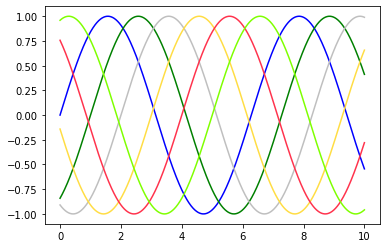

In [35]:
fig = plt.figure()
x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

![](color.png)

Line plots can additionally have markers to highlight the actual data points. Since
matplotlib creates a continuous line plot, interpolating between points, it can occasionally
be unclear where the points lie. The marker can be part of the style string,
which must have color followed by marker type and line style

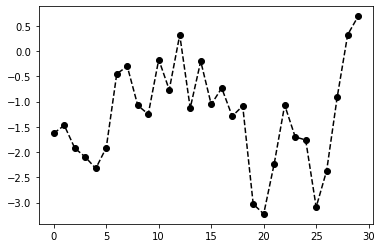

In [ ]:
from numpy.random import randn
plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

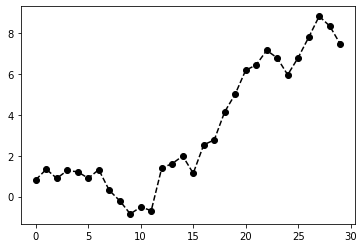

In [ ]:
plt.figure()
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

![](linestyle.png)

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

Text(0.5, 0, 'Stages')

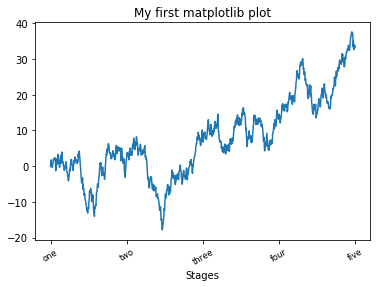

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

To change the x-axis ticks, it’s easiest to use `set_xticks` and `set_xticklabels`. The
former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels
using `set_xticklabels`:

In [ ]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

The `rotation` option sets the x tick labels at a 30-degree rotation. Lastly, `set_xlabel`
gives a name to the x-axis and `set_title` the subplot title

In [ ]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 17.200000000000003, 'Stages')

#### Adding legends

Legends are another critical element for identifying plot elements. There are a couple
of ways to add one. The easiest is to pass the `label` argument when adding each piece
of the plot:

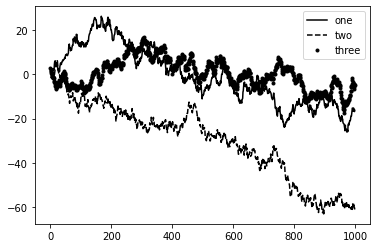

In [12]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

Once you’ve done this, you can either call ax.legend() or plt.legend() to automatically
create a legend.

In [11]:
ax.legend(loc='best')

The `legend` method has several other choices for the location `loc` argument.

|Location String |	Location Code|
| ------------- |:-------------:|
|'best'	|0|
|'upper right'|	1|
|'upper left'|	2|
|'lower left'|	3|
|'lower right'|	4|
|'right'|	5|
|'center left'|	6|
|'center right'|	7|
|'lower center'|	8|
|'upper center'|	9|
|'center'|	10|

### Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control. The most basic way to adjust axis limits is to use the `plt.xlim(`) and `plt.ylim()` methods:

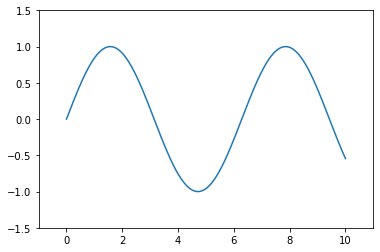

In [ ]:
plt.figure()
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

A useful related method is `plt.axis()`. The `plt.axis()` method allows you to set the x and y limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`

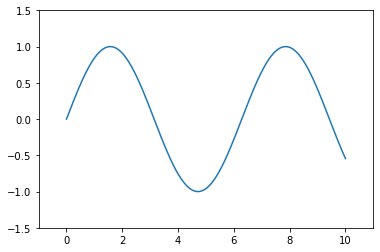

In [ ]:
plt.figure()
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Additional keyword arguments to plt.plot specify a wide range of properties of the lines and markers:

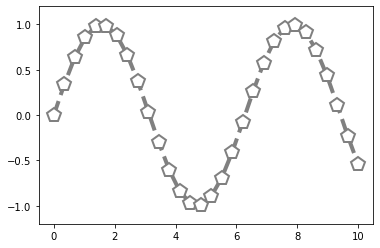

In [ ]:
plt.figure()
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, '--p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

![](sphx_glr_marker_reference_002.png)

### Scatter Plots with `plt.scatter`:

A second, more powerful method of creating scatter plots is the plt.scatter function, which can be used very similarly to the plt.plot function:

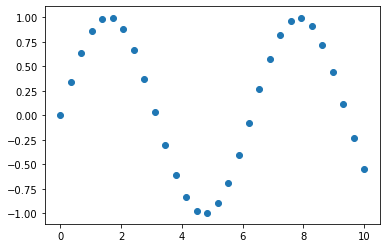

In [ ]:
plt.figure()
plt.scatter(x, y, marker='o');

The primary difference of `plt.scatter` from `plt.plot` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

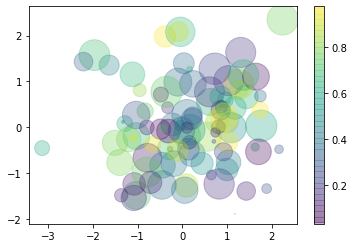

In [ ]:
plt.figure()
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

![](colormap.png)

### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations,
which could consist of text, arrows, or other shapes. You can add annotations
and text using the `text`, `arrow`, and `annotate` functions. text draws text at given
coordinates (x, y) on the plot with optional custom styling:

```python
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```

(0.0, 10.0, 0.0, 10.0)

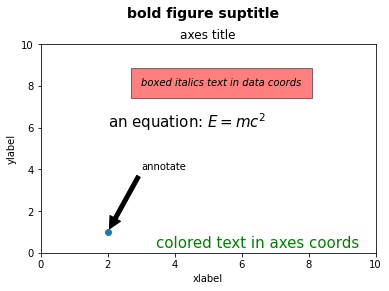

In [20]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)


#The default transform specifies that text is in data coords, 
#alternatively, you can specify text in axis coords (0,0 is lower-left and 1,1 is upper-right). 
#The example below places text in the center of the axes:
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

### Plotting with categorical variables
It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

Text(0.5, 0.98, 'Categorical Plotting')

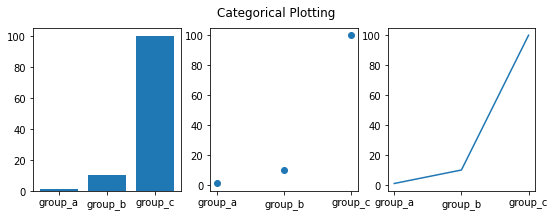

In [36]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

fig = plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')

let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance)
and annotate it with some of the important dates from the 2008–2009 financial crisis.
You can most easily reproduce this code example in a single cell in a Jupyter notebook

/Users/qiweih/anaconda3/envs/skmob/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

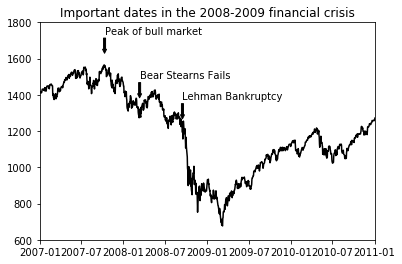

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

days = matplotlib.dates.date2num(spx.index)
prices = spx.values

ax.plot_date(days, prices, fmt='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

### Saving Plots to File

You can save the active figure to file using `plt.savefig`. This method is equivalent to
the figure object’s savefig instance method. For example, to save an png version of a
figure, you need only type:

```python
plt.savefig('figpath.png')
```

The file type is inferred from the file extension. So if you used .pdf instead, you
would get a PDF. There are a couple of important options that I use frequently for
publishing graphics: dpi, which controls the dots-per-inch resolution, and
bbox_inches, which can trim the whitespace around the actual figure. To get the
same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you
would do:

```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

The `savefig` method can save the figures in the following file types:

In [ ]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily
toward preparing figures for publication. Fortunately, nearly all of the default
behavior can be customized via an extensive set of global parameters governing figure
size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the
configuration programmatically from Python is to use the rc method; for example, to
set the global default figure size to be 10 × 10, you could enter:

```python
plt.rc('figure', figsize=(10, 10))
```

The first argument to rc is the component you wish to customize, such as 'figure',
'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. After that can follow a
sequence of keyword arguments indicating the new parameters. An easy way to write
down the options in your program is as a dict:

```python
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

## Controlling the style

There are many styles available in Matplotlib in order to let you tailor your visualization to your needs. To see a list of styles, we can use `pyplot.style`.

In [ ]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

The basic way to switch to a stylesheet is to call:

```python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session! Alternatively, you can use the style context manager, which sets a style temporarily:

```python
with plt.style.context('stylename'):
    make_a_plot()
```

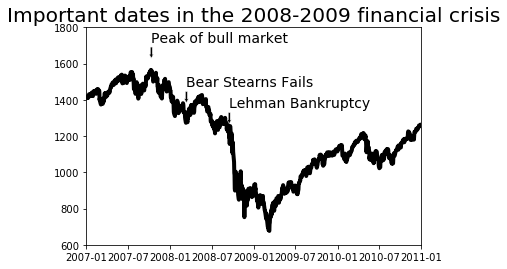

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
with plt.style.context('fivethirtyeight'):
    days = matplotlib.dates.date2num(spx.index)
    prices = spx.values

    ax.plot_date(days, prices, fmt='k-')

    crisis_data = [
        (datetime(2007, 10, 11), 'Peak of bull market'),
        (datetime(2008, 3, 12), 'Bear Stearns Fails'),
        (datetime(2008, 9, 15), 'Lehman Bankruptcy')
    ]

    for date, label in crisis_data:
        ax.annotate(label, xy=(date, spx.asof(date) + 75),
                    xytext=(date, spx.asof(date) + 225),
                    arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                    headlength=4),
                    horizontalalignment='left', verticalalignment='top')

    # Zoom in on 2007-2010
    ax.set_xlim(['1/1/2007', '1/1/2011'])
    ax.set_ylim([600, 1800])

    ax.set_title('Important dates in the 2008-2009 financial crisis')

### Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings, e.g. pandas dataframe's columns

Text(0, 0.5, 'entry b')

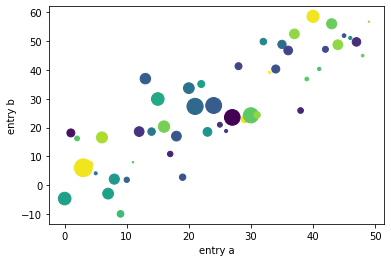

In [ ]:
fig = plt.figure()
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')


## Exercises: Iris dataset

Now let's try to visualize our best friend: Iris dataset:

In [22]:
from sklearn import datasets
iris = datasets.load_iris()

In [64]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [40]:
from sklearn import datasets
iris = datasets.load_iris()

sepals = iris.data[:, :2]
petals = iris.data[:, 2:]
species = iris.target

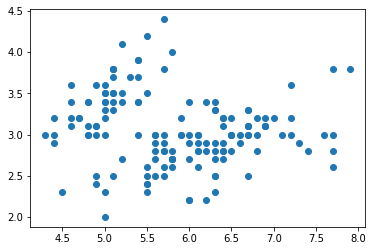

In [41]:
plt.figure()
plt.scatter(sepals[:, 0], sepals[:, 1]);

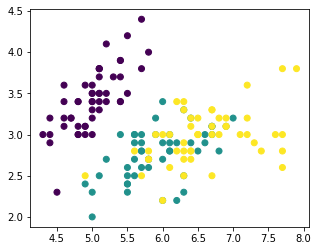

In [42]:
plt.figure(figsize=(5, 4))
plt.scatter(sepals[:, 0], sepals[:, 1], c=species);

Add some tranparency to the scatter plot

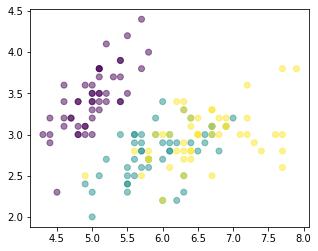

In [43]:
plt.figure(figsize=(5, 4))
plt.scatter(sepals[:, 0], sepals[:, 1], c=species, alpha=0.5);

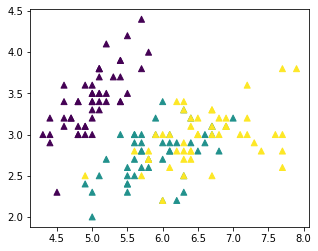

In [44]:
plt.figure(figsize=(5, 4))
plt.scatter(sepals[:, 0], sepals[:, 1], c=species, marker='^');

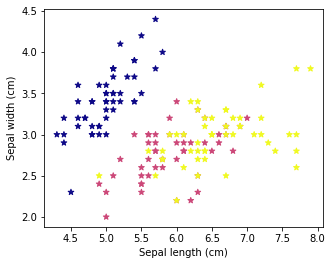

In [45]:
plt.figure(figsize=(5, 4))
plt.scatter(sepals[:, 0], sepals[:, 1], c=species, marker='*', cmap='plasma')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)');

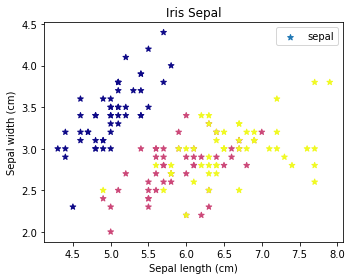

In [46]:
plt.figure(figsize=(5, 4))
plt.scatter(sepals[:, 0], sepals[:, 1], c=species, marker='*', cmap='plasma',
           label='sepal')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris Sepal')
plt.legend()

plt.tight_layout()

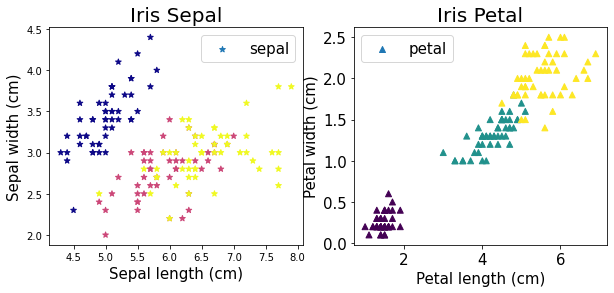

In [47]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))

ax[0].scatter(sepals[:, 0], sepals[:, 1], c=species, marker='*', cmap='plasma',
           label='sepal')

ax[1].scatter(petals[:, 0], petals[:, 1], c=species, marker='^', cmap='viridis',
           label='petal')

ax[0].set_title('Iris Sepal', fontsize=20)
ax[0].set_xlabel('Sepal length (cm)', fontsize=15)
ax[0].set_ylabel('Sepal width (cm)', fontsize=15)
ax[0].legend(fontsize=15)

ax[1].set_title('Iris Petal', fontsize=20)
ax[1].set_xlabel('Petal length (cm)', fontsize=15)
ax[1].set_ylabel('Petal width (cm)', fontsize=15)
ax[1].legend(fontsize=15)

ax[1].tick_params(axis="both", labelsize=15)

In [51]:
iris_df = pd.DataFrame(iris.data, 
                       columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['species'] = iris.target_names[iris.target]

In [52]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [53]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


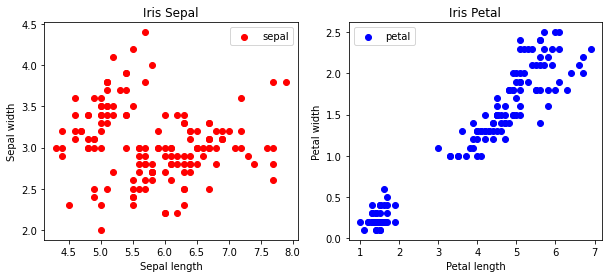

In [54]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))
ax[0].scatter(data=iris_df, x="sepal_length", y="sepal_width", label="sepal", color='r')
ax[1].scatter(data=iris_df, x="petal_length", y="petal_width", label="petal", color='b')
ax[0].set(title='Iris Sepal', xlabel='Sepal length', ylabel='Sepal width')
ax[1].set(title='Iris Petal', xlabel='Petal length', ylabel='Petal width')
ax[0].legend()
ax[1].legend()

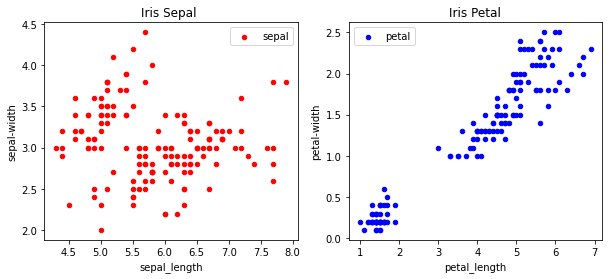

In [55]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))
iris_df.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], sharex=False, sharey=False,
             label="sepal", color='r')
iris_df.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], sharex=False, sharey=False,
             label="petal", color='b')
ax[0].set(title='Iris Sepal ', ylabel='sepal-width')
ax[1].set(title='Iris Petal',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

In [56]:
#Create 3 DataFrame for each Species
setosa = iris_df[iris_df['species']=='setosa']
versicolor =iris_df[iris_df['species']=='versicolor']
virginica =iris_df[iris_df['species']=='virginica']

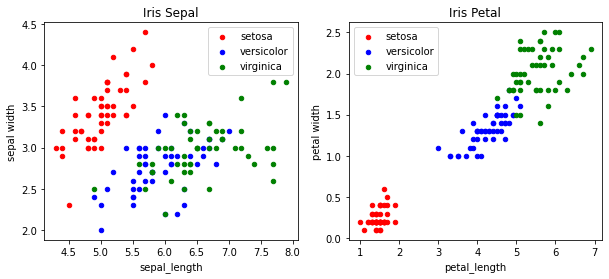

In [57]:
fig,ax=plt.subplots(1,2,figsize=(10, 4))

setosa.plot(x="sepal_length", y="sepal_width", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="sepal_length",y="sepal_width",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal_length", y="petal_width", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petal_length",y="petal_width",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Iris Sepal', ylabel='sepal width')
ax[1].set(title='Iris Petal',  ylabel='petal width')
ax[0].legend()
ax[1].legend()

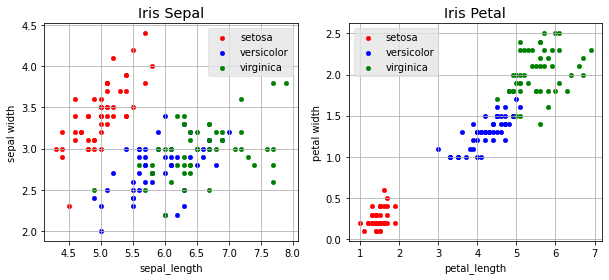

In [58]:
fig,ax=plt.subplots(1,2,figsize=(10, 4))

with plt.style.context('ggplot'):
    setosa.plot(x="sepal_length", y="sepal_width", kind="scatter",ax=ax[0],label='setosa',color='r')
    versicolor.plot(x="sepal_length",y="sepal_width",kind="scatter",ax=ax[0],label='versicolor',color='b')
    virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='virginica', color='g')

    setosa.plot(x="petal_length", y="petal_width", kind="scatter",ax=ax[1],label='setosa',color='r')
    versicolor.plot(x="petal_length",y="petal_width",kind="scatter",ax=ax[1],label='versicolor',color='b')
    virginica.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='virginica', color='g')

    ax[0].set(title='Iris Sepal', ylabel='sepal width')
    ax[1].set(title='Iris Petal',  ylabel='petal width')
    ax[0].legend()
    ax[1].legend()